In [1]:
import numpy as np
import pandas as pd
import cv2
from PIL import Image

import matplotlib.pyplot as plt

# Get Data

In [2]:
shipsnet_df = pd.read_json('data/shipsnet.json')
shipsnet_df['filename'] = shipsnet_df.apply(
    lambda x: f"{x['labels']}__{x['scene_ids']}__{x['locations'][0]}_{x['locations'][1]}",
    axis=1
)
n_colors, height, width = 3, 80, 80
shipsnet_df['image'] = shipsnet_df['data'].apply(
    lambda x: np.reshape(x, [n_colors, height, width]).swapaxes(0, 1).swapaxes(1, 2)
)
shipsnet_df

,data,labels,locations,scene_ids,filename,image
0,"[82, 89, 91, 87, 89, 87, 86, 86, 86, 86, 84, 8...",1,"[-118.2254694333423, 33.73803725920789]",20180708_180909_0f47,1__20180708_180909_0f47__-118.2254694333423_33...,"[[[82, 94, 80], [89, 99, 86], [91, 101, 89], [..."
1,"[76, 75, 67, 62, 68, 72, 73, 73, 68, 69, 69, 6...",1,"[-122.33222866289329, 37.7491755586813]",20170705_180816_103e,1__20170705_180816_103e__-122.33222866289329_3...,"[[[76, 86, 70], [75, 85, 70], [67, 77, 64], [6..."
2,"[125, 127, 129, 130, 126, 125, 129, 133, 132, ...",1,"[-118.14283073363218, 33.736016066914175]",20180712_211331_0f06,1__20180712_211331_0f06__-118.14283073363218_3...,"[[[125, 136, 111], [127, 138, 114], [129, 140,..."
3,"[102, 99, 113, 106, 96, 102, 105, 105, 103, 10...",1,"[-122.34784341495181, 37.76648707436548]",20170609_180756_103a,1__20170609_180756_103a__-122.34784341495181_3...,"[[[102, 105, 87], [99, 101, 86], [113, 111, 97..."
4,"[78, 76, 74, 78, 79, 79, 79, 82, 86, 85, 83, 8...",1,"[-122.34852408322172, 37.75878462398653]",20170515_180653_1007,1__20170515_180653_1007__-122.34852408322172_3...,"[[[78, 82, 68], [76, 81, 67], [74, 79, 65], [7..."
...,...,...,...,...,...,...
3995,"[126, 122, 124, 138, 165, 186, 195, 199, 203, ...",0,"[-122.08693255500694, 37.77781408256089]",20170815_180821_102d,0__20170815_180821_102d__-122.08693255500694_3...,"[[[126, 103, 88], [122, 101, 87], [124, 103, 8..."
3996,"[130, 134, 139, 128, 117, 126, 141, 147, 142, ...",0,"[-122.10549691828378, 37.76946626247702]",20170730_191230_0f21,0__20170730_191230_0f21__-122.10549691828378_3...,"[[[130, 122, 93], [134, 126, 97], [139, 129, 1..."
3997,"[171, 135, 118, 140, 145, 144, 154, 165, 139, ...",0,"[-122.48298739296371, 37.684929808845375]",20161116_180804_0e14,0__20161116_180804_0e14__-122.48298739296371_3...,"[[[171, 174, 171], [135, 138, 136], [118, 121,..."
3998,"[85, 90, 94, 95, 94, 92, 93, 96, 93, 94, 94, 9...",0,"[-122.29028216570079, 37.71632091139081]",20170211_181116_0e16,0__20170211_181116_0e16__-122.29028216570079_3...,"[[[85, 92, 83], [90, 98, 88], [94, 102, 94], [..."


# Pillow

In [3]:
example_file = shipsnet_df['filename'][0]  # use first image as example

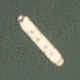

In [4]:
ship_image = Image.open(f"data/shipsnet/shipsnet/{example_file}.png")
ship_image

In [5]:
# convert pillow image into numpy array
ship_image_np = np.asarray(ship_image)
print(ship_image_np.shape)
ship_image_np

(80, 80, 3)


array([[[ 82,  94,  80],
        [ 89,  99,  86],
        [ 91, 101,  89],
        ...,
        [ 89, 102,  86],
        [ 84,  96,  81],
        [ 83,  96,  84]],

       [[ 89, 100,  86],
        [ 91, 102,  88],
        [ 89, 101,  89],
        ...,
        [101, 115,  97],
        [ 87, 100,  84],
        [ 87,  99,  86]],

       [[ 91, 101,  88],
        [ 93, 104,  92],
        [ 86,  98,  85],
        ...,
        [ 83,  96,  81],
        [ 90, 102,  88],
        [ 92, 102,  89]],

       ...,

       [[ 89,  98,  87],
        [ 88,  98,  86],
        [ 92, 102,  89],
        ...,
        [ 88,  99,  86],
        [ 85,  97,  84],
        [ 89, 100,  87]],

       [[ 87,  99,  87],
        [ 88,  99,  86],
        [ 91, 101,  88],
        ...,
        [ 91, 101,  88],
        [ 90, 101,  88],
        [ 90, 102,  89]],

       [[ 88,  99,  85],
        [ 91, 101,  87],
        [ 90, 101,  87],
        ...,
        [ 88, 101,  86],
        [ 89, 102,  88],
        [ 90, 102,  89]]

# Numpy and Matplotlib Directly

In [6]:
# read directly
ship_image_np = plt.imread(f"data/shipsnet/shipsnet/{example_file}.png")*255
ship_image_np = ship_image_np.astype(np.uint8)
ship_image_np

array([[[ 82,  94,  80],
        [ 89,  99,  86],
        [ 91, 101,  89],
        ...,
        [ 89, 102,  86],
        [ 84,  96,  81],
        [ 83,  96,  84]],

       [[ 89, 100,  86],
        [ 91, 102,  88],
        [ 89, 101,  89],
        ...,
        [101, 115,  97],
        [ 87, 100,  84],
        [ 87,  99,  86]],

       [[ 91, 101,  88],
        [ 93, 104,  92],
        [ 86,  98,  85],
        ...,
        [ 83,  96,  81],
        [ 90, 102,  88],
        [ 92, 102,  89]],

       ...,

       [[ 89,  98,  87],
        [ 88,  98,  86],
        [ 92, 102,  89],
        ...,
        [ 88,  99,  86],
        [ 85,  97,  84],
        [ 89, 100,  87]],

       [[ 87,  99,  87],
        [ 88,  99,  86],
        [ 91, 101,  88],
        ...,
        [ 91, 101,  88],
        [ 90, 101,  88],
        [ 90, 102,  89]],

       [[ 88,  99,  85],
        [ 91, 101,  87],
        [ 90, 101,  87],
        ...,
        [ 88, 101,  86],
        [ 89, 102,  88],
        [ 90, 102,  89]]

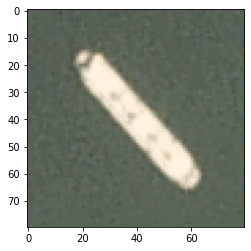

In [7]:
fig = plt.figure()
ax = fig.gca()
ax.imshow(ship_image_np)

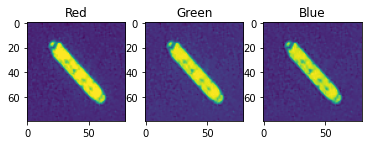

In [8]:
# Display each channel

fig = plt.figure()

ax1 = fig.add_subplot(131)
ax1.imshow(ship_image_np[0:80, 0:80, 0])
ax1.set_title('Red')

ax2 = fig.add_subplot(132)
ax2.imshow(ship_image_np[0:80, 0:80, 1])
ax2.set_title('Green')

ax3 = fig.add_subplot(133)
ax3.set_title('Blue')
ax3.imshow(ship_image_np[0:80, 0:80, 2])

plt.show()

# OpenCV

In [9]:
ship_image_np = cv2.imread(f"data/shipsnet/shipsnet/{example_file}.png")  # note, reads in BGR, not RGB
ship_image_np = cv2.cvtColor(ship_image_np, cv2.COLOR_BGR2RGB)  # converts back to RGB
ship_image_np

array([[[ 82,  94,  80],
        [ 89,  99,  86],
        [ 91, 101,  89],
        ...,
        [ 89, 102,  86],
        [ 84,  96,  81],
        [ 83,  96,  84]],

       [[ 89, 100,  86],
        [ 91, 102,  88],
        [ 89, 101,  89],
        ...,
        [101, 115,  97],
        [ 87, 100,  84],
        [ 87,  99,  86]],

       [[ 91, 101,  88],
        [ 93, 104,  92],
        [ 86,  98,  85],
        ...,
        [ 83,  96,  81],
        [ 90, 102,  88],
        [ 92, 102,  89]],

       ...,

       [[ 89,  98,  87],
        [ 88,  98,  86],
        [ 92, 102,  89],
        ...,
        [ 88,  99,  86],
        [ 85,  97,  84],
        [ 89, 100,  87]],

       [[ 87,  99,  87],
        [ 88,  99,  86],
        [ 91, 101,  88],
        ...,
        [ 91, 101,  88],
        [ 90, 101,  88],
        [ 90, 102,  89]],

       [[ 88,  99,  85],
        [ 91, 101,  87],
        [ 90, 101,  87],
        ...,
        [ 88, 101,  86],
        [ 89, 102,  88],
        [ 90, 102,  89]]

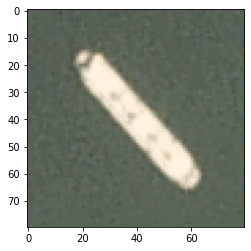

In [10]:
fig = plt.figure()
ax = fig.gca()
ax.imshow(ship_image_np)